# HW 2: Machine Learning Pipeline
  
Aya Liu    
04/18/2019 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import pipeline

In [3]:
data_file = 'data/credit-data.csv'

# 1) Read data

In [4]:
# Read data
coltypes = {'PersonID': str, 
            'SeriousDlqin2yrs': int,
            'RevolvingUtilizationOfUnsecuredLines': float,
            'age': int,
            'zipcode': str}
data = pd.read_csv(data_file, dtype=coltypes)
data.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0


# 2) Explore data

16.1% of the total sample had serious delinquency in the past 2 years.  
Average and median age is around 51 years old.

In [5]:
# Distribution of all numeric variables
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.000000,41016.00000,41016.000000,41016.000000,41016.000000,3.304200e+04,41016.000000,41016.000000,41016.000000,41016.000000,39979.000000
mean,0.161400,6.37587,51.683489,0.589233,331.458137,6.578996e+03,8.403477,0.419592,1.008801,0.371587,0.773231
std,0.367904,221.61895,14.746880,5.205628,1296.109695,1.344683e+04,5.207324,5.190382,1.153826,5.169641,1.121269
min,0.000000,0.00000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.03431,41.000000,0.000000,0.176375,3.333000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.18973,51.000000,0.000000,0.369736,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.66716,62.000000,0.000000,0.866471,8.055750e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,22000.00000,109.000000,98.000000,106885.000000,1.794060e+06,56.000000,98.000000,32.000000,98.000000,13.000000


In [6]:
# Set constants for column names
SD = 'SeriousDlqin2yrs'
RU = 'RevolvingUtilizationOfUnsecuredLines'
MI = 'MonthlyIncome'
DR = 'DebtRatio'
PASTDUE30_59 = 'NumberOfTime30-59DaysPastDueNotWorse'
PASTDUE60_89 = 'NumberOfTime60-89DaysPastDueNotWorse'
OPENLOANS = 'NumberOfOpenCreditLinesAndLoans'
RELOANS ='NumberRealEstateLoansOrLines'
NUMDEP = 'NumberOfDependents'

### Higher Revolving Utilization Of Unsecured Lines is highly indicative of serious delinquency

In [7]:
# Summary statistics for Revolving Utilization Of Unsecured Lines
# grouped by whether the person had serious delinquency
ru = pipeline.summarize_by_group(SD, RU, data)
ru

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,,,,,,,,
0,34396.0,6.821758,234.218185,0.0,0.026347,0.128939,0.483727,22000.0
1,6620.0,4.059138,138.823604,0.0,0.405447,0.839318,1.000000,8328.0


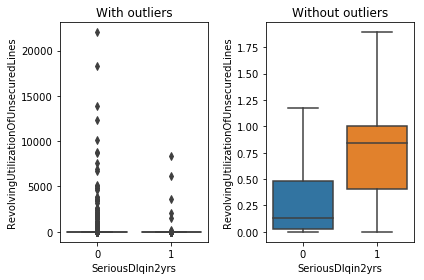

In [8]:
# Distribution of the variable including and excluding outliers
pipeline.plot_dist(SD, RU, data)

In [9]:
# Check percentage of outliers in each group
pipeline.perc_outliers(SD, RU, 2, data)

Percentage of people having RevolvingUtilizationOfUnsecuredLines > 2
	for SeriousDlqin2yrs = 0: 0.0026456564716827538
	for SeriousDlqin2yrs = 1: 0.006042296072507553


/Users/lzy/Documents/work/study/uchicago/courses/ml/hws/hw2/pipeline.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  perc = len(data[data[group] == g][data[var] > threshold]) / \


### Higher number of times 30-59 days past due and number of times 60-89 days past due are associated with having serious delinquency

In [10]:
# Summary statistics for the Number Of Time 30-59 Days Past Due 
# grouped by whether the person had serious delinquency
pastdue30_59 = pipeline.summarize_by_group(SD, PASTDUE30_59, data)
pastdue30_59

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,,,,,,,,
0,34396.0,0.248197,2.373425,0.0,0.0,0.0,0.0,98.0
1,6620.0,2.361178,11.614687,0.0,0.0,0.0,2.0,98.0


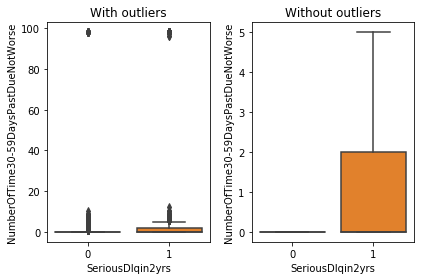

In [11]:
# Distribution of the variable including and excluding outliers
pipeline.plot_dist(SD, PASTDUE30_59, data)

In [12]:
# Check percentage of outliers in each group
pipeline.perc_outliers(SD, PASTDUE30_59, 5, data)

Percentage of people having NumberOfTime30-59DaysPastDueNotWorse > 5
	for SeriousDlqin2yrs = 0: 0.001453657402023491
	for SeriousDlqin2yrs = 1: 0.026586102719033233


In [13]:
# Summary statistics for the Number Of Time 60-89 Days Past Due 
# grouped by whether the person had serious delinquency
pastdue60_89 = pipeline.summarize_by_group(SD, PASTDUE60_89, data)
pastdue60_89

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,,,,,,,,
0,34396.0,0.095156,2.314893,0.0,0.0,0.0,0.0,98.0
1,6620.0,1.807855,11.631755,0.0,0.0,0.0,1.0,98.0


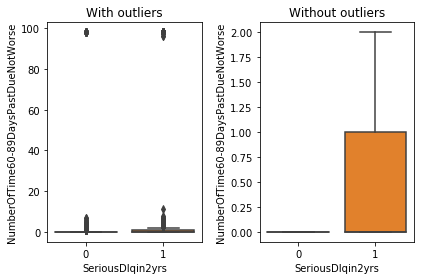

In [14]:
# Distribution of the variable including and excluding outliers
pipeline.plot_dist(SD, PASTDUE60_89, data)

In [15]:
# Percentage of outliers in each group
pipeline.perc_outliers(SD, PASTDUE30_59, 2 , data)

Percentage of people having NumberOfTime30-59DaysPastDueNotWorse > 2
	for SeriousDlqin2yrs = 0: 0.013519013838818468
	for SeriousDlqin2yrs = 1: 0.13459214501510575


### Debt Ratio alone gives little information 

Debt ratio alone does not give much information about likelihood to have serious delinquencies, mostly because there is a huge variance in debt ratios for both people with and without serious delinqencies. 

Median debt ratio is higher (42.7%) for people with serious delinquencies than that for people without (36.0%). However, 11.3% people without serious delinquencies have a debt ratio larger than 1000, which is higher than the percentage for people with serious delinquencies（8.0%).


In [16]:
# Summary statistics for debt ratio
# grouped by whether the person had serious delinquency
dr = pipeline.summarize_by_group(SD, DR, data)
dr

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,,,,,,,,
0,34396.0,339.135574,1301.472391,0.0,0.172103,0.359875,0.860747,106885.0
1,6620.0,291.567939,1267.229353,0.0,0.196992,0.426882,0.895111,38793.0


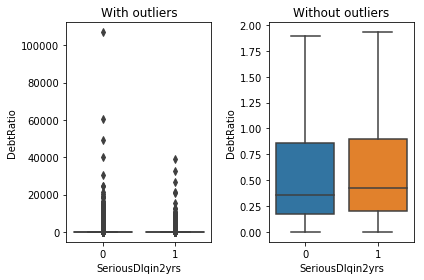

In [17]:
# Distribution of the variable including and excluding outliers
pipeline.plot_dist(SD, DR, data)

In [18]:
# Check percentage of outliers in each group
pipeline.perc_outliers(SD, DR, 2, data)

Percentage of people having DebtRatio > 2
	for SeriousDlqin2yrs = 0: 0.2078148621932783
	for SeriousDlqin2yrs = 1: 0.17341389728096676


### People with serious delinquencies has a lower median monthly income within a much smaller range than people without 

In [19]:
# Summary statistics for median income
# grouped by whether the person had serious delinquency
mi = pipeline.summarize_by_group(SD, MI, data)
mi

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,,,,,,,,
0,27514.0,6776.748201,14435.322958,0.0,3450.0,5475.0,8333.00,1794060.0
1,5528.0,5594.740774,6518.244005,0.0,2940.0,4500.0,6811.75,250000.0


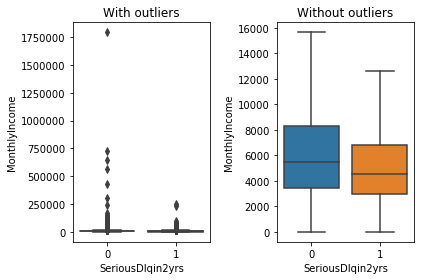

In [20]:
# Distribution of the variable including and excluding outliers
pipeline.plot_dist(SD, MI, data)

In [21]:
# Check percentage of outliers in each group
pipeline.perc_outliers(SD, MI, 16000, data)

Percentage of people having MonthlyIncome > 16000
	for SeriousDlqin2yrs = 0: 0.030381439702290965
	for SeriousDlqin2yrs = 1: 0.01918429003021148


### Neither number of open credit lines / loans and number of mortgage / real estate loans have little to do with having serious delinquencies

In [22]:
# Summary statistics for number of open credit lines and or loans
# grouped by whether the person had serious delinquency
openloans = pipeline.summarize_by_group(SD, OPENLOANS, data)
openloans

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,,,,,,,,
0,34396.0,8.494621,5.116000,0.0,5.0,8.0,11.0,56.0
1,6620.0,7.929909,5.634878,0.0,4.0,7.0,11.0,52.0


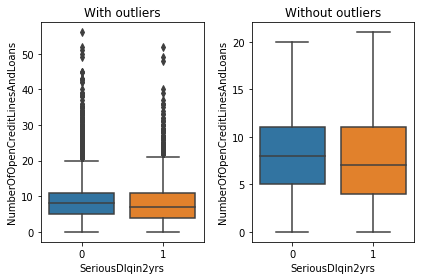

In [23]:
# Distribution of the variable including and excluding outliers
pipeline.plot_dist(SD, OPENLOANS, data)

In [24]:
# Check percentage of outliers in each group
pipeline.perc_outliers(SD, OPENLOANS, 25, data)

Percentage of people having NumberOfOpenCreditLinesAndLoans > 25
	for SeriousDlqin2yrs = 0: 0.007704384230724503
	for SeriousDlqin2yrs = 1: 0.008610271903323263


In [25]:
# Summary statistics for number of mortgage or real estate loans
# grouped by whether the person had serious delinquency
reloans = pipeline.summarize_by_group(SD, RELOANS, data)
reloans

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,,,,,,,,
0,34396.0,1.014188,1.102338,0.0,0.0,1.0,2.0,32.0
1,6620.0,0.980816,1.390760,0.0,0.0,1.0,2.0,25.0


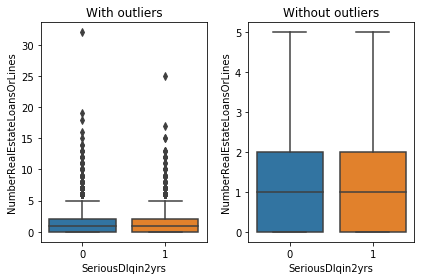

In [26]:
# Distribution of the variable including and excluding outliers
pipeline.plot_dist(SD, RELOANS, data)

# 3) Pre-Process Data

In [27]:
# Fill columns with NA values with median of that variable
data = pipeline.fill_na_with_median(data)

In [28]:
# Check there is no NA values
data.isna().any()

PersonID                                False
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
zipcode                                 False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                           False
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                      False
dtype: bool

# 4) Generate Features/Predictors

Generate *Revolving Utilization Of Unsecured Lines* into features

In [29]:
# Discretize continuous variable Revolving Utilization Of Unsecured Lines into 5 categories
RUCAT = 'RevolvingUtilizationOfUnsecuredLines_cat'
RU_bins = [0.0, 0.5, 1.0, 1.5, 2.0, np.inf]
RU_labels = ['<0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '>2.0']
data[RUCAT] = pipeline.discretize(RU, data, bins=RU_bins, labels=RU_labels)
data.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RevolvingUtilizationOfUnsecuredLines_cat
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0,0.5-1.0
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0,0.5-1.0
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0,<0.5
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0,0.5-1.0
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0,<0.5


In [30]:
# Convert the categorical to dummy variables 
data = pipeline.convert_to_dummy(RUCAT, data)
data.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RevolvingUtilizationOfUnsecuredLines_cat,RevolvingUtilizationOfUnsecuredLines_cat_<0.5,RevolvingUtilizationOfUnsecuredLines_cat_0.5-1.0,RevolvingUtilizationOfUnsecuredLines_cat_1.0-1.5,RevolvingUtilizationOfUnsecuredLines_cat_1.5-2.0,RevolvingUtilizationOfUnsecuredLines_cat_>2.0
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0,0.5-1.0,0,1,0,0,0
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0,0.5-1.0,0,1,0,0,0
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0,<0.5,1,0,0,0,0
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0,0.5-1.0,0,1,0,0,0
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0,<0.5,1,0,0,0,0


# 5) Build Classifier

Build a decision tree classifier using the following features:

In [31]:
# Select feature columns
feat_cols = [RUCAT + "_" + v for v in RU_labels]
feat_cols.append('zipcode')
for f in feat_cols:
    print(f)

RevolvingUtilizationOfUnsecuredLines_cat_<0.5
RevolvingUtilizationOfUnsecuredLines_cat_0.5-1.0
RevolvingUtilizationOfUnsecuredLines_cat_1.0-1.5
RevolvingUtilizationOfUnsecuredLines_cat_1.5-2.0
RevolvingUtilizationOfUnsecuredLines_cat_>2.0
zipcode


In [32]:
# Create, fit, and predict a tree (default test size = 0.25) 
clf, y_test, y_pred = pipeline.build_tree_clf(SD, feat_cols, data, random_state=20190418)

# 6) Evaluate Classifier


Calculate model accuracy -- how often is the model correct?

In [33]:
# Calculate model accuracy -- how often is the model correct?
print("Accuracy:", pipeline.evaluate_accuracy(y_test, y_pred))

Accuracy: 0.8518626877316169
